### Содержание

1. [Заметки](#Заметки)
2. [Проверка соответствия полей](#Проверка-соответствия-полей-в-хэдере-с-полем-vep-варианта)
3. [Сравнение таблиц](#Сравнение-таблиц)
4. [Разбираемся с каноническими транскриптами](#Разбираемся-с-каноническими-транскриптами)  

6. [Расчёты для презентации](#Расчёты-для-презентации)
7. [Графики для презентации](#Графики-для-презентации)  
   6.1. [Распределение значений в LoF](#Распределение-значений-в-LoF)  
   6.2. [Распределение значений в LoF_flag](#Распределение-значений-в-LoF_flag)   
   6.3. [График распределения по импакту](#График-распределения-по-импакту-(примерный))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from os.path import join

In [2]:
DATA_PATH = "data_dir"

### Заметки

Подсчёт кол-ва строк с PASS в файле 18 хромосомы

In [ ]:
awk '{FS="\t"} $7 ~ "PASS"' data_dir/gnomad.exomes.v4.0.sites.chr18.vcf | wc -l

Разархивировать bgz

In [ ]:
! bgzip -d example.vcf.bgz

Заархивировать, не удаляя исходник

In [ ]:
bgzip -c file_to_compress.vcf > compressed_file.vcf.bgz

### Проверка соответствия полей в хэдере с полем vep варианта

Скопируем в переменную значение одного поля vep любого варианта.

In [ ]:
variant = '-|frameshift_variant|HIGH|TUBB8B|ENSG00000173213|Transcript|ENST00000308911|protein_coding|4/4||ENST00000308911.9:c.1131_1132del|ENSP00000496713.1:p.Phe378HisfsTer27|1189-1190|1131-1132|377-378|LF/LX|ctCTtc/cttc|1||-1||deletion|HGNC|HGNC:24983|YES|NM_001358689.2|||P1|CCDS86657.1|ENSP00000496713||Ensembl|||CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01163|||||||||HC|||PERCENTILE:0.847940074906367,GERP_DIST:0,BP_DIST:203,DIST_FROM_LAST_EXON:-854,50_BP_RULE:FAIL,ANN_ORF:0,MAX_ORF:0'.split('|')

In [ ]:
len(a)

В другую переменную запишем хэдер. Уже видим несоответствие в количестве полей (46 != 48).

In [ ]:
vep_field_names = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [ ]:
len(vep_field_names)

Распределим названия полей с их значениями с помощью zip. Видим несоответсвие блиеж к концу:  
* HGVS_OFFSET: CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:1&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01161&Prints:PR01
* LoF_flags:
  HC

Всё смещено, значение DOMAINS оказалось в HGVS_OFFSET, а значение LoF -- в LoF_flags

In [ ]:
for field_name, value in zip(vep_field_names, variant):
    print(f"{field_name}: {value}")

Добавим в хэдер два искусственных поля между SOURCE и DOMAINS.

In [ ]:
vep_field_names_2 = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|||DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [ ]:
len(vep_field_names_2)

Значения полей вернулись на свои места.

In [ ]:
for field_name, value in zip(vep_field_names_2, variant):
    print(f"{field_name}: {value}")

### Сравнение таблиц

Ниже я проверяла корректность двух парсеров, сравнивая результаты варианта парсера 1 и варианта парсера 2 на одинаковых исходных данных.

In [ ]:
comparison_result_cons = my_file_old['Consequence'] == my_file_mods['Consequence']
count_false_cons = len(comparison_result) - comparison_result.sum()
print(count_false_cons)

In [ ]:
comparison_result = my_file_old['Gene_symbol'] == my_file_mods['Gene_symbol']

count_false = len(comparison_result) - comparison_result.sum()
print(count_false)

In [ ]:
are_identical = my_file_old.equals(my_file_mods)

print(f"Два датафрейма идентичны: {are_identical}")

In [ ]:
df_diff = my_file_old.compare(my_file_mods)

# Выводим результат
print("Различия между датафреймами:")
print(df_diff)

In [ ]:
my_file_mods.loc[84, 'LoF_flag']

In [ ]:
my_file_old['LoF_flag'].isna().sum()

In [ ]:
my_file_mods['LoF_flag'].isna().sum()

In [ ]:
my_file_mods['LoF_flag'].dropna().nunique()

### Разбираемся с каноническими транскриптами

Вынесем в переменные несколько полей vep одного варианта.

In [191]:
# a = 'T|downstream_gene_variant|MODIFIER|TUBB8B|ENSG00000173213|Transcript|ENST00000308911|protein_coding||||||||||1|1171|-1||SNV|HGNC|HGNC:24983|YES|NM_001358689.2|||P1|CCDS86657.1|ENSP00000496713||Ensembl|||||||||||||||'.split('|')
# b = 'T|downstream_gene_variant|MODIFIER||ENSG00000282965|Transcript|ENST00000572530|lncRNA||||||||||1|3765|-1||SNV|||YES|||3|||||Ensembl|||||||||||||||'.split('|')
# c = 'T|downstream_gene_variant|MODIFIER||ENSG00000262181|Transcript|ENST00000575066|unprocessed_pseudogene||||||||||1|3|1||SNV|||YES||||||||Ensembl|||||||||||||||'.split('|')
# d = 'T|downstream_gene_variant|MODIFIER||ENSG00000282965|Transcript|ENST00000575325|lncRNA||||||||||1|3850|-1||SNV||||||4|||||Ensembl|||||||||||||||'.split('|')
# e = 'T|downstream_gene_variant|MODIFIER|TUBB8B|ENSG00000173213|Transcript|ENST00000594555|processed_transcript||||||||||1|1878|-1||SNV|HGNC|HGNC:24983||||3|||||Ensembl|||||||||||||||'.split('|')
# f = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|NM_001358689.2|protein_coding||||||||||1|1171|-1||SNV|EntrezGene|HGNC:24983||ENST00000308911.9|||||NP_001345618.1||RefSeq|||||||||||||||'.split('|')
# g = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|NM_001389609.1|protein_coding||||||||||1|1174|-1||SNV|EntrezGene|HGNC:24983|||||||NP_001376538.1||RefSeq|||||||||||||||'.split('|')
# h = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|NM_001389610.1|protein_coding||||||||||1|1174|-1||SNV|EntrezGene|HGNC:24983|||||||NP_001376539.1||RefSeq|||||||||||||||'.split('|')
# i = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451143.1|protein_coding||||||||||1|1047|-1||SNV|EntrezGene|HGNC:24983|||||||XP_024306911.1||RefSeq|||||||||||||||'.split('|')
# j = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451144.1|protein_coding||||||||||1|1047|-1||SNV|EntrezGene|HGNC:24983|||||||XP_024306912.1||RefSeq|||||||||||||||'.split('|')
# k = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451145.1|protein_coding||||||||||1|1067|-1||SNV|EntrezGene|HGNC:24983|||||||XP_024306913.1||RefSeq|||||||||||||||'.split('|')
# l = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451146.1|protein_coding||||||||||1|1067|-1||SNV|EntrezGene|HGNC:24983|||||||XP_024306914.1||RefSeq|||||||||||||||'.split('|')
# m = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451147.1|protein_coding||||||||||1|1067|-1||SNV|EntrezGene|HGNC:24983|||||||XP_024306915.1||RefSeq|||||||||||||||'.split('|')
# n = 'T|downstream_gene_variant|MODIFIER|TUBB8B|260334|Transcript|XM_024451148.1|protein_coding||||||||||1|1035|-1||SNV|EntrezGene|HGNC:24983|YES||||||XP_024306916.1||RefSeq|||||||||||||||'.split('|')
# o = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753311.1|lncRNA||4/4|XR_001753311.1:n.1327+500C>T|||||||1||1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')
# p = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753312.1|lncRNA||5/5|XR_001753312.1:n.1227+500C>T|||||||1||1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')
# q = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753313.1|lncRNA||4/4|XR_001753313.1:n.1327+500C>T|||||||1||1||SNV|EntrezGene||YES||||||||RefSeq|||||||||||||||'.split('|')
# r = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753314.1|lncRNA||4/4|XR_001753314.1:n.1272+500C>T|||||||1||1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')
# s = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_002958209.1|lncRNA||5/5|XR_002958209.1:n.1227+500C>T|||||||1||1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')
# t = 'T|intron_variant&non_coding_transcript_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_935077.2|lncRNA||4/4|XR_935077.2:n.913+500C>T|||||||1||1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')
# u = 'T|downstream_gene_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_935078.2|lncRNA||||||||||1|1852|1||SNV|EntrezGene||||||||||RefSeq|||||||||||||||'.split('|')

In [194]:
# data = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u]

# for item in data:
#     print("Consequence:", item[vep_field_names_2.index('Consequence')])
#     print("SYMBOL:", item[vep_field_names_2.index('SYMBOL')])
#     print("Feature:", item[vep_field_names_2.index('Feature')])
#     print("CANONICAL:", item[vep_field_names_2.index('CANONICAL')])
#     print()

In [195]:
vep_field_names_2 = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|SYMBOL_SOURCE|HGNC_ID|CANONICAL|MANE_SELECT|MANE_PLUS_CLINICAL|TSL|APPRIS|CCDS|ENSP|UNIPROT_ISOFORM|SOURCE|||DOMAINS|miRNA|HGVS_OFFSET|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|TRANSCRIPTION_FACTORS|LoF|LoF_filter|LoF_flags|LoF_info'.split('|')

In [196]:
a = 'C|synonymous_variant|LOW|TUBB8B|ENSG00000173213|Transcript|ENST00000308911|protein_coding|4/4||ENST00000308911.9:c.1083A>G|ENSP00000496713.1:p.Leu361=|1141|1083|361|L|ctA/ctG|1||-1||SNV|HGNC|HGNC:24983|YES|NM_001358689.2|||P1|CCDS86657.1|ENSP00000496713||Ensembl|||CDD:cd02187&PANTHER:PTHR11588&PANTHER:PTHR11588&Gene3D:3&Pfam:PF03953&SMART:SM00865&Superfamily:SSF55307&Prints:PR01163||||||||||||'.split('|')

b = 'C|downstream_gene_variant|MODIFIER||ENSG00000282965|Transcript|ENST00000572530|lncRNA||||||||||1|2173|-1||SNV|||YES|||3|||||Ensembl|||||||||||||||'.split('|')

c = 'C|downstream_gene_variant|MODIFIER||ENSG00000262181|Transcript|ENST00000575066|unprocessed_pseudogene||||||||||1|1595|1||SNV|||YES||||||||Ensembl|||||||||||||||'.split('|')

d = 'C|synonymous_variant|LOW|TUBB8B|260334|Transcript|XM_024451148.1|protein_coding|3/3||XM_024451148.1:c.624A>G|XP_024306916.1:p.Leu208=|878|624|208|L|ctA/ctG|1||-1||SNV|EntrezGene|HGNC:24983|YES||||||XP_024306916.1||RefSeq|||||||||||||||'.split('|')

e = 'C|downstream_gene_variant|MODIFIER|LOC105371950|105371950|Transcript|XR_001753313.1|lncRNA||||||||||1|626|1||SNV|EntrezGene||YES||||||||RefSeq|||||||||||||||'.split('|')

In [197]:
data = [a, b, c, d, e]

for item in data:
    print("Consequence:", item[vep_field_names_2.index('Consequence')])
    print("SYMBOL:", item[vep_field_names_2.index('SYMBOL')])
    print("Feature:", item[vep_field_names_2.index('Feature')])
    print("CANONICAL:", item[vep_field_names_2.index('CANONICAL')])
    print()

Consequence: synonymous_variant
SYMBOL: TUBB8B
Feature: ENST00000308911
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: 
Feature: ENST00000572530
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: 
Feature: ENST00000575066
CANONICAL: YES

Consequence: synonymous_variant
SYMBOL: TUBB8B
Feature: XM_024451148.1
CANONICAL: YES

Consequence: downstream_gene_variant
SYMBOL: LOC105371950
Feature: XR_001753313.1
CANONICAL: YES



Варианты без SYMBOL не учитываем, тогда остаётся (в даном примере) для TUBB8B два варианта канонического транскрипта: из Ensemble или RefSeq.  
Останавливаемся на **Ensemble**.

### Расчёты для презентации

Ниже расчёты для файлов, содержащих информацию ТОЛЬКО для канонических транскриптов.

In [9]:
# df_chr18 = pd.read_table(join(DATA_PATH, "clean_v.4.0_chr18.tsv"))
# df_chr21 = pd.read_table(join(DATA_PATH, "clean_v.4.0_chr21.tsv"))

df_chr18 = pd.read_table(join(DATA_PATH, "uniqs_18chr.tsv"))
df_chr21 = pd.read_table(join(DATA_PATH, "uniqs_21chr.tsv"))

In [3]:
df_chr22 = pd.read_table(join(DATA_PATH, "uniqs_22chr.tsv"))

In [6]:
df_chr22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621638 entries, 0 to 1621637
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Chr          1621638 non-null  object
 1   Position     1621638 non-null  int64 
 2   rsID         1621638 non-null  object
 3   Ref          1621638 non-null  object
 4   Alt          1621638 non-null  object
 5   Impact       1598149 non-null  object
 6   Consequence  1598149 non-null  object
 7   Gene_symbol  1598149 non-null  object
 8   LoF          30874 non-null    object
 9   LoF_flag     4510 non-null     object
 10  LoF_filter   3026 non-null     object
dtypes: int64(1), object(10)
memory usage: 136.1+ MB


In [5]:
df_chr22.head()

,Chr,Position,rsID,Ref,Alt,Impact,Consequence,Gene_symbol,LoF,LoF_flag,LoF_filter
0,chr22,10736362,rs879131185,C,T,MODIFIER,upstream_gene_variant,U2,NaN,NaN,NaN
1,chr22,10736399,rs1206833908,T,C,MODIFIER,upstream_gene_variant,U2,NaN,NaN,NaN
2,chr22,10736400,rs1289580688,G,A,MODIFIER,upstream_gene_variant,U2,NaN,NaN,NaN
3,chr22,10736414,.,G,C,MODIFIER,upstream_gene_variant,U2,NaN,NaN,NaN
4,chr22,10736415,.,C,T,MODIFIER,upstream_gene_variant,U2,NaN,NaN,NaN


Посмотрим, сколько всего строк с **pLoF**-ами:

**Хромосомы 18 и 21**

In [10]:
# меняем NA на пустые строки, чтобы сработал str.contains
count_consq_18 = df_chr18[df_chr18['Consequence'].\
              str.contains("transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation", na=False)].\
              shape[0]

count_consq_21 = df_chr21[df_chr21['Consequence'].\
              str.contains("transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation", na=False)].\
              shape[0]

print("Общее число pLoF на 18 хромосоме:", count_consq_18)
print("Общее число pLoF на 21 хромосоме:", count_consq_21)

Общее число pLoF на 18 хромосоме: 23740
Общее число pLoF на 21 хромосоме: 15344


In [11]:
count_consq_wo_flags_18 = len(df_chr18[(df_chr18['Consequence'].str.contains("transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation")) & \
                       (df_chr18['LoF_flag'].isnull())])

count_consq_wo_flags_21 = len(df_chr21[(df_chr21['Consequence'].str.contains("transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation")) & \
                       (df_chr21['LoF_flag'].isnull())])

print("Общее число pLoF без LoF флагов на 18 хромосоме:", count_consq_wo_flags_18)
print("Общее число pLoF без LoF флагов на 21 хромосоме:", count_consq_wo_flags_21)

Общее число pLoF без LoF флагов на 18 хромосоме: 21046
Общее число pLoF без LoF флагов на 21 хромосоме: 13010


In [44]:
total_count_18 = df_chr18.shape[0]
total_count_21 = df_chr21.shape[0]

per_lof_18 = round(count_consq_18 * 100 / total_count_18, 2)
per_lof_wo_flags_18 = round(count_consq_wo_flags_18 * 100 / total_count_18, 1)

per_lof_21 = round(count_consq_21 * 100 / total_count_21, 2)
per_lof_wo_flags_21 = round(count_consq_wo_flags_21 * 100 / total_count_21, 1)

print(f"Итого в файле 18 хромосомы содержится {per_lof_18}% LoF всего, из них {per_lof_wo_flags_18}% не содержат LoF флагов.")
print(f"Итого в файле 21 хромосомы содержится {per_lof_21}% LoF всего, из них {per_lof_wo_flags_21}% не содержат LoF флагов.")


Итого в файле 18 хромосомы содержится 2.15% LoF всего, из них 1.9% не содержат LoF флагов.
Итого в файле 21 хромосомы содержится 2.07% LoF всего, из них 1.8% не содержат LoF флагов.


**Хромосома 22**

In [4]:
count_consq_22 = df_chr22[df_chr22['Consequence'].str.contains(
    "transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation", na=False)].shape[0]

count_consq_wo_flags_22 = len(df_chr22[(df_chr22['Consequence'].str.contains(
    "transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|feature_elongation|feature_truncation", na=False)) &
    (df_chr22['LoF_flag'].isnull())])

print("Общее число pLoF на 22 хромосоме:", count_consq_22)
print("Общее число pLoF без LoF флагов на 22 хромосоме:", count_consq_wo_flags_22)


Общее число pLoF на 22 хромосоме: 33534
Общее число pLoF без LoF флагов на 22 хромосоме: 29024


In [5]:
total_count_22 = df_chr22.shape[0]

per_lof_22 = round(count_consq_22 * 100 / total_count_22, 2)
per_lof_wo_flags_22 = round(count_consq_wo_flags_22 * 100 / total_count_22, 1)

print(f"Всего вариантов {total_count_22}")
print(f"Итого в файле 22 хромосомы содержится {per_lof_22}% LoF всего, из них {per_lof_wo_flags_22}% не содержат LoF флагов.")

Всего вариантов 1621638
Итого в файле 22 хромосомы содержится 2.07% LoF всего, из них 1.8% не содержат LoF флагов.


In [77]:
# меняем NA на пустые строки, чтобы сработал str.contains
df_chr22['Impact'] = df_chr22['Impact'].fillna('')

count_consq_22 = df_chr22[df_chr22['Impact'].\
              str.contains("HIGH")].\
              shape[0]

count_consq_wo_flags_22 = len(df_chr22[(df_chr22['Impact'].str.contains("HIGH")) & \
                       (df_chr22['LoF_flag'].isnull())])

print("Общее число pLoF на 22 хромосоме:", count_consq_22)
print("Общее число pLoF без LoF флагов на 22 хромосоме:", count_consq_wo_flags_22)

Общее число pLoF на 22 хромосоме: 33534
Общее число pLoF без LoF флагов на 22 хромосоме: 29024


In [78]:
total_count_22= df_chr22.shape[0]

per_lof_22 = round(count_consq_22 * 100 / total_count_22, 2)
per_lof_wo_flags_22 = round(count_consq_wo_flags_22 * 100 / total_count_22, 1)

print(f"Итого в файле 22 хромосомы содержится {per_lof_22}% LoF всего, из них {per_lof_wo_flags_22}% не содержат LoF флагов.")


Итого в файле 22 хромосомы содержится 2.07% LoF всего, из них 1.8% не содержат LoF флагов.


### Графики для презентации

Аналогично, ниже графики для файлов с информацией **только** о каноническом транскрипте.

#### Распределение значений в LoF

**Хромосома 21**

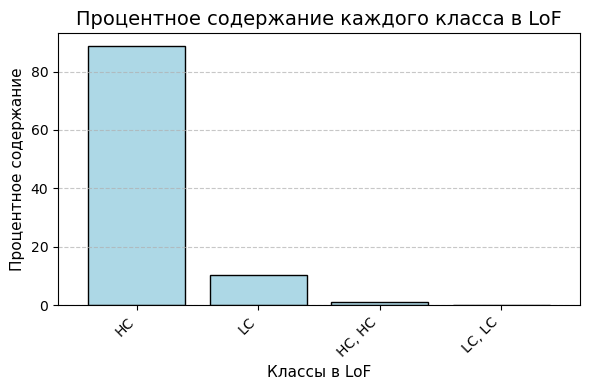

In [173]:
# График для значений в столбце LoF 21 хромосома

counts_LoF = df_chr21['LoF'].value_counts()
percentages_LoF = counts_LoF / counts_LoF.sum() * 100

plt.figure(figsize=(6, 4))
percentages_LoF.plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)
plt.title('Процентное содержание каждого класса в LoF', fontsize=14)
plt.xlabel('Классы в LoF', fontsize=11)
plt.ylabel('Процентное содержание', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Распределение значений в LoF_flag  

**Хромосома 22**

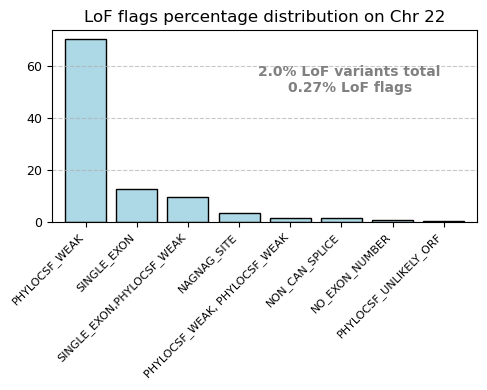

In [13]:
# График для значений в столбце LoF_flag 22 хромосома

counts_LoF_flag = df_chr22['LoF_flag'].value_counts()
percentages_LoF_flag = counts_LoF_flag / counts_LoF_flag.sum() * 100

plt.figure(figsize=(5, 4))

percentages_LoF_flag.plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)

plt.title('LoF flags percentage distribution on Chr 22', fontsize=12)
#plt.xlabel('Flags', fontsize=12)
plt.xlabel('')
#plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.text(0.7, 0.74, '2.0% LoF variants total\n0.27% LoF flags', transform=plt.gca().transAxes,
         fontsize=10, weight='bold', color='grey', verticalalignment='center', horizontalalignment='center'
         )

plt.tight_layout()
plt.savefig('lof_flag_chr22_counts.png', bbox_inches='tight', dpi=300)
plt.show()


#### График распределения по impact и consequense (примерный)

In [5]:
high = ["transcript_ablation", "splice_acceptor_variant", "splice_donor_variant", "stop_gained",
          "frameshift_variant", "stop_lost", "start_lost", "transcript_amplification", "feature_elongation",
          "feature_truncation"]

moderate = ["inframe_insertion", "inframe_deletion", "missense_variant", "protein_altering_variant"]

low = ["splice_donor_5th_base_variant", "splice_region_variant", "splice_donor_region_variant",
          "splice_polypyrimidine_tract_variant", "incomplete_terminal_codon_variant", "start_retained_variant",
          "stop_retained_variant", "synonymous_variant"]

modifier = ["coding_sequence_variant", "mature_miRNA_variant", "5_prime_UTR_variant", "3_prime_UTR_variant",
          "non_coding_transcript_exon_variant", "intron_variant", "NMD_transcript_variant",
          "non_coding_transcript_variant", "coding_transcript_variant", "upstream_gene_variant",
          "downstream_gene_variant", "TFBS_ablation", "TFBS_amplification", "TF_binding_site_variant",
          "regulatory_region_ablation", "regulatory_region_amplification", "regulatory_region_variant",
          "intergenic_variant", "sequence_variant"]

**Хромосома 22**

In [42]:
filtered_df_chr22 = df_chr22[(df_chr22['Alt'].str.len() == 1) & (df_chr22['Ref'].str.len() <= 2)]

In [6]:
categories_impact_22 = ['HIGH', 'MODERATE', 'LOW', 'MODIFIER']
impact_22 = df_chr22[df_chr22['Impact'].isin(categories_impact_22)]

impact_counts_22 = impact_22['Impact'].value_counts()
impact_counts_22

Impact
MODIFIER    739887
MODERATE    189914
LOW         128624
HIGH         21746
Name: count, dtype: int64

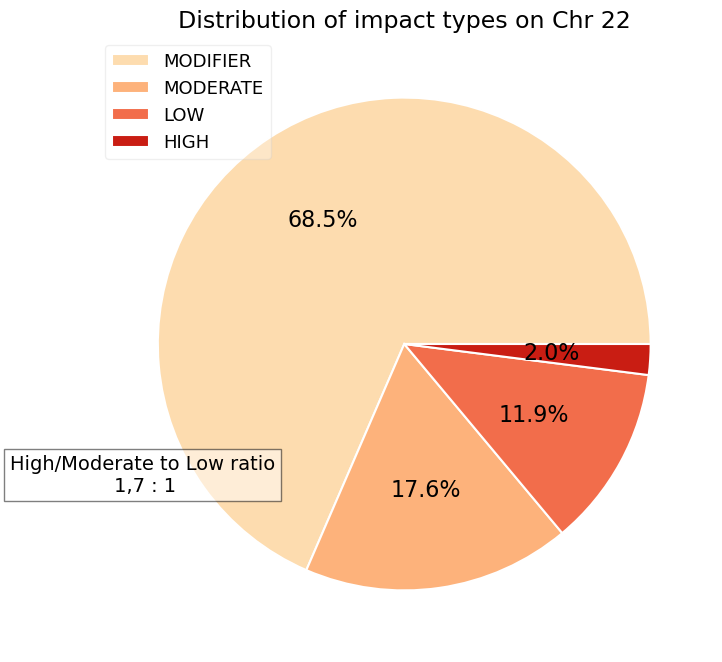

In [7]:
colors = list(sns.color_palette('OrRd', len(impact_counts_22))) # Greens

plt.figure(figsize=(8, 8))
labels = impact_counts_22.index
#explode = [0.12, 0, 0, 0]

plt.pie(impact_counts_22, 
                            autopct='%1.1f%%', 
                            textprops={'fontsize': 16}, 
                            #startangle=170,
                            colors=colors, 
                            wedgeprops=dict(edgecolor='white', 
                            linewidth=1.5),
                            #explode=explode
       )

plt.legend(labels, loc='upper left', fontsize=13, framealpha = 0.3)

plt.title('Distribution of impact types on Chr 22', fontsize=17)

plt.text(-1.6, -0.6, 
         'High/Moderate to Low ratio\n                 1,7 : 1', 
         fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('impact_counts_chr22.png', bbox_inches='tight', dpi=300)
plt.show()


In [52]:
round((17.6 + 2) / 11.9, 1)

1.6

In [44]:
categories_consequence_22 = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']
consequences_22 = filtered_df_chr22[filtered_df_chr22['Consequence'].isin(categories_consequence_22)]

consequence_counts_22 = consequences_22['Consequence'].value_counts()

In [18]:
consequence_counts_22

Consequence
stop_gained                5717
splice_donor_variant       2052
splice_acceptor_variant    1820
Name: count, dtype: int64

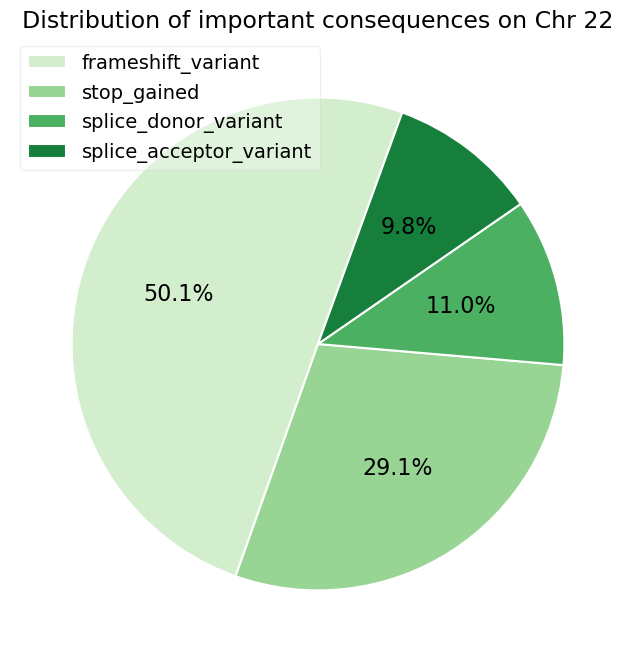

In [26]:
colors = list(sns.color_palette('Greens', len(consequence_counts_22)))

plt.figure(figsize=(8, 8))
labels = consequence_counts_22.index
#explode = [0.12, 0, 0, 0]

plt.pie(consequence_counts_22, 
                            autopct='%1.1f%%', 
                            textprops={'fontsize': 16}, 
                            startangle=70,
                            colors=colors, 
                            wedgeprops=dict(edgecolor='white', 
                            linewidth=1.5),
                            #explode=explode
       )

plt.legend(labels, loc='upper left', fontsize=14, framealpha = 0.3)

plt.title('Distribution of important consequences on Chr 22', fontsize=17)

# plt.text(0.5, 0.95, 
#          'A total of 33,082,413 variants were found. LoF Variants - 296,307 (0.896% of all variants)', 
#          horizontalalignment='left',
#          verticalalignment='baseline', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('consequence_counts_chr22.png', bbox_inches='tight', dpi=300)
plt.show()


Совместим два графика:

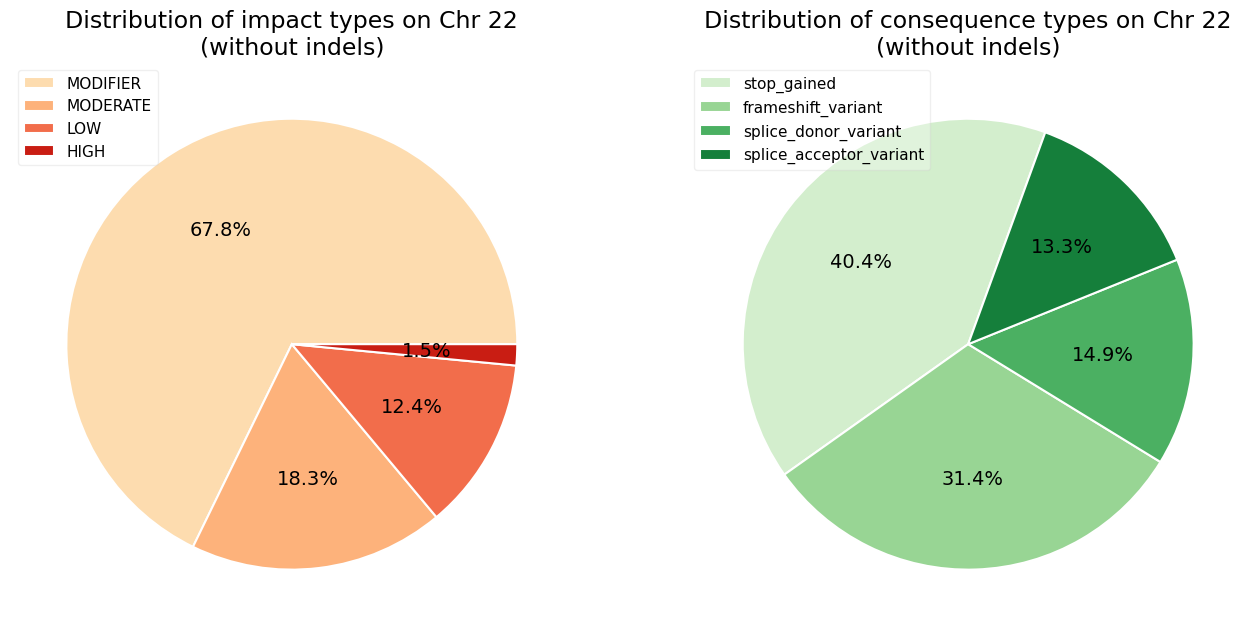

In [45]:
labels_1 = impact_counts_22.index
labels_2 = consequence_counts_22.index

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 строка, 2 столбца

# График для impact Chr 22
axs[0].pie(impact_counts_22, 
           autopct='%1.1f%%', 
           textprops={'fontsize': 14}, 
           #startangle=170,
           colors=sns.color_palette('OrRd', len(impact_counts_22)), 
           wedgeprops=dict(edgecolor='white', linewidth=1.5))

axs[0].legend(labels_1, loc='upper left', fontsize=11, framealpha=0.3)
axs[0].set_title('Distribution of impact types on Chr 22\n(without indels)', fontsize=17)


# График для consequence Chr 22
axs[1].pie(consequence_counts_22, 
           autopct='%1.1f%%', 
           textprops={'fontsize': 14}, 
           startangle=70,
           colors=sns.color_palette('Greens', len(consequence_counts_22)), 
           wedgeprops=dict(edgecolor='white', linewidth=1.5))

axs[1].legend(labels_2, loc='upper left', fontsize=11, framealpha=0.3)
axs[1].set_title('Distribution of consequence types on Chr 22\n(without indels)', fontsize=17)

#plt.savefig('combined_chr22.png', bbox_inches='tight', dpi=300)
plt.savefig('combined_chr22_wo_indels.png', bbox_inches='tight', dpi=300)
plt.show()

Как вариант, можно побаловаться с выделением нужного сектора/шрифтами/размерами

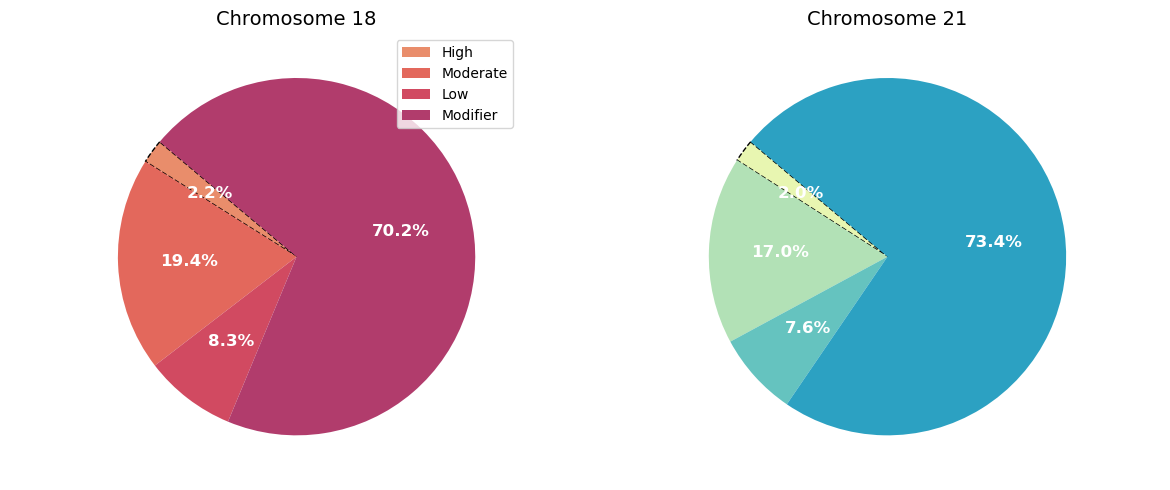

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# График для хромосомы 18
wedges1, texts1, autotexts1 = axs[0].pie(impact_percentages_18, labels=categories, autopct='%1.1f%%', startangle=140,
                                    colors=sns.color_palette('flare'), 
                                    textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'})

axs[0].set_title('Chromosome 18', fontsize=14)
axs[0].legend(categories, loc='upper right', fontsize=10)

for w in wedges1:
    if w.get_label() == 'High':
        w.set_linestyle('--')
        w.set_edgecolor('black')

# График для хромосомы 21
wedges2, texts2, autotexts2 = axs[1].pie(impact_percentages_21, labels=categories, autopct='%1.1f%%', startangle=140,
                                    colors=sns.color_palette('YlGnBu'), 
                                    textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'})

axs[1].set_title('Chromosome 21', fontsize=14)

for w in wedges2:
    if w.get_label() == 'High':
        w.set_linestyle('--')
        w.set_edgecolor('black')


# Отображение графиков
plt.tight_layout()
plt.show()
